In [65]:
##### Koch_alpha @ YYE
##### Dec. 2024
### Generate Koch-like shapes' coordinates with arbitraty angles

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [3]:
def koch_line(start, end, alpha, direction):
    """
    Segments a line to Koch line, creating fractals.
    :param tuple start:  (x, y) coordinates of the starting point
    :param tuple end: (x, y) coordinates of the end point
    :alpha: angle for Koch triangle (unit: rad)
    :direction: 凹(+1)凸(-1), concave or convex?
    ~returns tuple: tuple of three points between the segmentation
    """
    
    x1, y1 = start[0], start[1] # coordinates of the start
    x2, y2 = end[0], end[1]     # coordinates of the end
    
    # the length of the line
    deltax, deltay = x2 - x1, y2 - y1
    l = np.sqrt((deltax)**2 + (deltay)**2)
    coef = np.sqrt( 2 * (1 - np.cos(alpha)) ) + 2
    segm = l / (coef)
    #dist = segm * coef
    beta = (np.pi - alpha)/2
    if x1==x2:
        if y1<y2:
            theta = + np.pi / 2
        if y1>y2:
            theta = - np.pi / 2
    else:
        theta = np.arctan((deltay)/(deltax))
    if x1>x2:
        theta += np.pi
    
    changex, changey = (deltax)/(coef), (deltay)/(coef)
    # second point: one third in each direction from the first point
    b = (x1+changex, y1+changey)
    # third point: rotation for multiple of 60 degrees
    degree = theta + beta * direction
    c = (b[0] + segm * np.cos(degree), b[1] + segm * np.sin(degree))
    # fourth point: two thirds in each direction from the first point
    d = (x2-changex, y2-changey)
    
    return [b, c, d]


def koch_line_mod(start, end, alpha, direction, r):
    """
    Segments a line to Koch line, creating fractals.
    :param tuple start:  (x, y) coordinates of the starting point
    :param tuple end: (x, y) coordinates of the end point
    :alpha: angle for Koch triangle (unit: rad)
    :direction: 凹(+1)凸(-1), concave or convex?
    ~returns tuple: tuple of three points between the segmentation
    """
    
    x1, y1 = start[0], start[1] # coordinates of the start
    x2, y2 = end[0], end[1]     # coordinates of the end
    
    # the length of the line
    deltax, deltay = x2 - x1, y2 - y1
    l = np.sqrt((deltax)**2 + (deltay)**2) ## l0
    #coef = np.sqrt( 2 * (1 - np.cos(alpha)) ) + 2
    coef = 2 * (1 + r * np.sin(alpha*0.5))
    lp = l / coef
    lm = l / coef * r
    #segm = l / (coef)
    #dist = segm * coef
    beta = (np.pi - alpha)/2
    if x1==x2:
        if y1<y2:
            theta = + np.pi / 2
        if y1>y2:
            theta = - np.pi / 2
    else:
        theta = np.arctan((deltay)/(deltax))
    if x1>x2:
        theta += np.pi
    
    changex, changey = (deltax)/(coef), (deltay)/(coef)
    # second point: one third in each direction from the first point
    b = (x1+changex, y1+changey)
    # third point: rotation for multiple of 60 degrees
    degree = theta + beta * direction
    c = (b[0] + lm * np.cos(degree), b[1] + lm * np.sin(degree))
    # fourth point: two thirds in each direction from the first point
    d = (x2-changex, y2-changey)
    
    return [b, c, d]



def Koch_generate(polygon, edge, angle, concave, generation):
    
    ## General initial coordinates
    initial_shape = polygon # 3 = triangle, 4 = square, 5 = star, etc.
    edge_length = edge # Initial edge length
    angle_ini = 2.0 * np.pi / initial_shape
    coordinate = []
    #new_x, new_y = 0, 0
    ## Move the polygon center as (0,0)
    tta = np.pi * (1 - 2/polygon)
    new_x, new_y = - edge_length/2, - edge_length/2 * np.tan(tta/2)

    for i in range(initial_shape):
        coordinate.append((new_x,new_y))
        new_x += edge_length * np.cos(i * angle_ini)
        new_y += edge_length * np.sin(i * angle_ini)
    coordinate.append(coordinate[0]) # To form a circle.

    
    max_degree = generation # Define the recursion order
    degre = angle # Define the fractal angle
    direction = concave # Define 凹(concave +1) 凸(convex -1)
    for i in range(max_degree): ## Recursion Order
        num_edge = len(coordinate)
        for j in range(num_edge-1): ## How many times to insert new points?
            num_point = j * 4
            coordinate = coordinate[:num_point+1] + koch_line(coordinate[num_point],coordinate[num_point+1],degre,direction) + coordinate[num_point+1:]

    return coordinate




def Koch_generate_mod(polygon, edge, angle, concave, generation, r):
    
    ## General initial coordinates
    initial_shape = polygon # 3 = triangle, 4 = square, 5 = star, etc.
    edge_length = edge # Initial edge length
    angle_ini = 2.0 * np.pi / initial_shape
    coordinate = []
    #new_x, new_y = 0, 0
    ## Move the polygon center as (0,0)
    tta = np.pi * (1 - 2/polygon)
    new_x, new_y = - edge_length/2, - edge_length/2 * np.tan(tta/2)

    for i in range(initial_shape):
        coordinate.append((new_x,new_y))
        new_x += edge_length * np.cos(i * angle_ini)
        new_y += edge_length * np.sin(i * angle_ini)
    coordinate.append(coordinate[0]) # To form a circle.

    
    max_degree = generation # Define the recursion order
    degre = angle # Define the fractal angle
    direction = concave # Define 凹(concave +1) 凸(convex -1)
    for i in range(max_degree): ## Recursion Order
        num_edge = len(coordinate)
        for j in range(num_edge-1): ## How many times to insert new points?
            num_point = j * 4
            coordinate = coordinate[:num_point+1] + koch_line_mod(coordinate[num_point],coordinate[num_point+1],degre,direction,r) + coordinate[num_point+1:]

    return coordinate

CPU times: user 32.1 ms, sys: 5.95 ms, total: 38.1 ms
Wall time: 43.3 ms


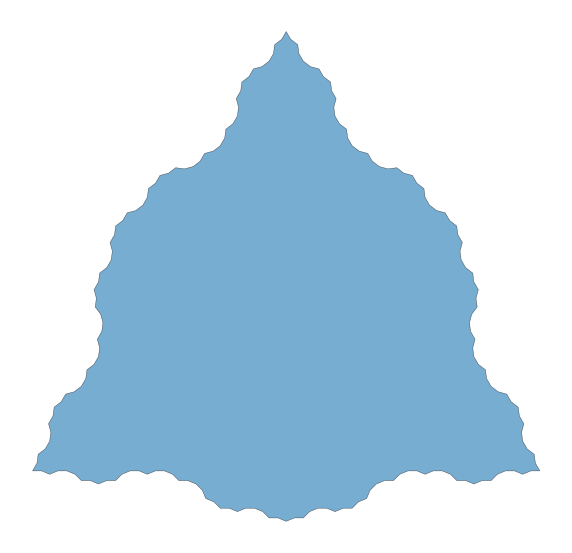

In [4]:
%%time
## General initial coordinates
initial_shape = 3 # 3 = triangle, 4 = square, 5 = star, etc.
edge_length = 2 # Initial edge length
angle_ini = 2.0 * np.pi / initial_shape
coordinate = []
new_x, new_y = 0, 0

for i in range(initial_shape):
    coordinate.append((new_x,new_y))
    new_x += edge_length * np.cos(i * angle_ini)
    new_y += edge_length * np.sin(i * angle_ini)
    
## To form a circle.
coordinate.append(coordinate[0])


max_degree = 3 ## Define the recursion order
alpha_ratio = 4/3
degre = np.pi/ alpha_ratio ## Define the fractal angle
direction = - 1  ## Define 凹(concave +1) 凸(convex -1)
for i in range(max_degree): ## Recursion Order
    num_edge = len(coordinate)
    for j in range(num_edge-1): ## How many times to insert new points?
        num_point = j * 4
        coordinate = coordinate[:num_point+1] + koch_line(coordinate[num_point],coordinate[num_point+1],degre,direction) + coordinate[num_point+1:]
##end
     
    
# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])

# fill the polygons
plt.figure(figsize=(10, 10))
#plt.figure(dpi=80)
plt.fill(pos_x, pos_y, edgecolor='black', lw=0.5, alpha = 0.6)
plt.axis('off')
plt.axis('scaled')
## Note, the initial point is located at (0,0). Thus we have to plot the center point by:?
#plt.scatter((coordinate[0][0]+coordinate[i//2][0])/2,(coordinate[0][1]+coordinate[i//2][1])/2,color="red",s=200)
plt.show

## chr(48~57) = 0~9 // + 48
if direction == +1:
    chr_direction = chr(43)
if direction == -1:
    chr_direction = chr(45)
## Name as: initial polygon + alpha angle + concave/convex + recursion degree. 
#filename = 'Koch_'+chr(initial_shape+48)+'_pi'+chr(alpha_ratio+48)+chr_direction+chr(max_degree+48)+'.pdf'
filename='test.pdf'
plt.savefig(filename, dpi=200, bbox_inches='tight')

CPU times: user 164 ms, sys: 33.8 ms, total: 198 ms
Wall time: 152 ms


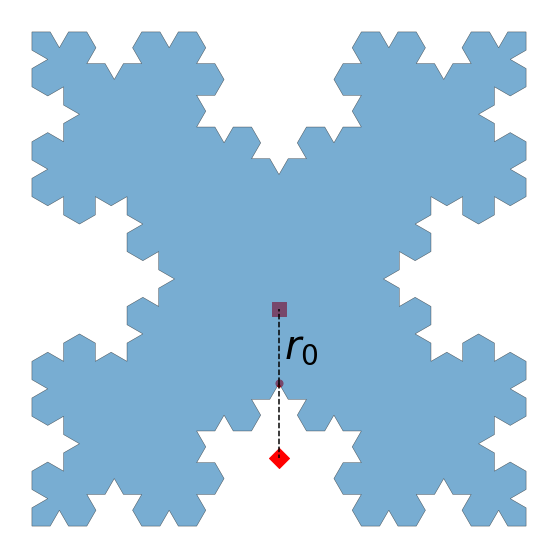

In [6]:
%%time
## General initial coordinates
initial_shape = 4 # 3 = triangle, 4 = square, 5 = star, etc.
edge_length = 2 # Initial edge length
angle_ini = 2.0 * np.pi / initial_shape
coordinate = []
new_x, new_y = 0, 0

for i in range(initial_shape):
    coordinate.append((new_x,new_y))
    new_x += edge_length * np.cos(i * angle_ini)
    new_y += edge_length * np.sin(i * angle_ini)
    
## To form a circle.
coordinate.append(coordinate[0])


max_degree = 3 ## Define the recursion order
alpha_ratio = 3
degre = np.pi/ alpha_ratio ## Define the fractal angle
direction = + 1  ## Define 凹(concave +1) 凸(convex -1)
for i in range(max_degree): ## Recursion Order
    num_edge = len(coordinate)
    for j in range(num_edge-1): ## How many times to insert new points?
        num_point = j * 4
        coordinate = coordinate[:num_point+1] + koch_line(coordinate[num_point],coordinate[num_point+1],degre,direction) + coordinate[num_point+1:]
##end
     
    
# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])

# fill the polygons
plt.figure(figsize=(10, 10))
#plt.figure(dpi=80)
plt.fill(pos_x, pos_y, edgecolor='black', lw=0.5, alpha = 0.6)
plt.axis('off')
plt.axis('scaled')
## Note, the initial point is located at (0,0). Thus we have to plot the center point by:?
i = 32
plt.scatter(coordinate[i][0],coordinate[i][1],color="red",s=200,marker='.')

plt.scatter(coordinate[i][0],coordinate[i][1]-0.3,color="red",s=200,marker='D')
plt.plot([coordinate[i][0],coordinate[i][0]],[coordinate[i][1],coordinate[i][1]-0.3], '--', color='black')
#plt.text(coordinate[i][0]+0.02,coordinate[i][1]-0.3,r"$r_0$",size=40)

plt.scatter(coordinate[i][0],coordinate[i][1]+0.3,color="red",s=200,marker='s')
plt.plot([coordinate[i][0],coordinate[i][0]],[coordinate[i][1],coordinate[i][1]+0.3], '--', color='black')
plt.text(coordinate[i][0]+0.02,coordinate[i][1]+0.1,r"$r_0$",size=40)


plt.show

## chr(48~57) = 0~9 // + 48
if direction == +1:
    chr_direction = chr(43)
if direction == -1:
    chr_direction = chr(45)
## Name as: initial polygon + alpha angle + concave/convex + recursion degree. 
#filename = 'Koch_'+chr(initial_shape+48)+'_pi'+chr(alpha_ratio+48)+chr_direction+chr(max_degree+48)+'.pdf'
filename='concave_sq.pdf'
plt.savefig(filename, dpi=200, bbox_inches='tight')

CPU times: user 64.9 ms, sys: 9.04 ms, total: 74 ms
Wall time: 37.1 ms


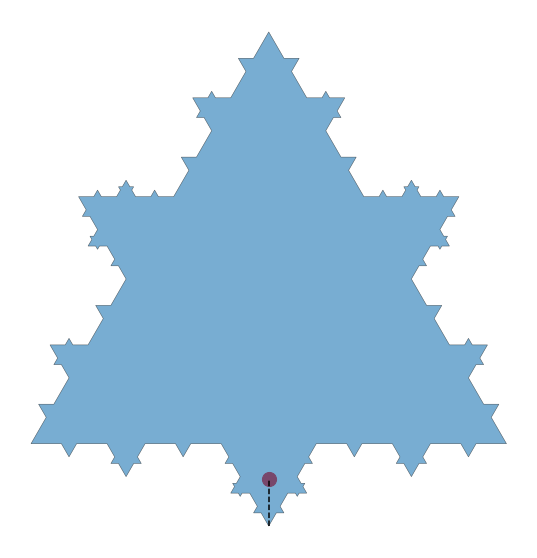

In [7]:
%%time
## General initial coordinates
initial_shape = 3 # 3 = triangle, 4 = square, 5 = star, etc.
edge_length = 2 # Initial edge length
r = 0.5
angle_ini = 2.0 * np.pi / initial_shape
coordinate = []
new_x, new_y = 0, 0

for i in range(initial_shape):
    coordinate.append((new_x,new_y))
    new_x += edge_length * np.cos(i * angle_ini)
    new_y += edge_length * np.sin(i * angle_ini)
    
## To form a circle.
coordinate.append(coordinate[0])


max_degree = 3 ## Define the recursion order
alpha_ratio = 3# 4/3
degre = np.pi/ alpha_ratio ## Define the fractal angle
direction = - 1  ## Define 凹(concave +1) 凸(convex -1)
for i in range(max_degree): ## Recursion Order
    num_edge = len(coordinate)
    for j in range(num_edge-1): ## How many times to insert new points?
        num_point = j * 4
        coordinate = coordinate[:num_point+1] + koch_line_mod(coordinate[num_point],coordinate[num_point+1],degre,direction,r) + coordinate[num_point+1:]
##end
     
    
# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])

# fill the polygons
plt.figure(figsize=(10, 10))
#plt.figure(dpi=80)
plt.fill(pos_x, pos_y, edgecolor='black', lw=0.5, alpha = 0.6)
plt.axis('off')
plt.axis('scaled')
## Note, the initial point is located at (0,0). Thus we have to plot the center point by:?
#plt.scatter((coordinate[0][0]+coordinate[i//2][0])/2,(coordinate[0][1]+coordinate[i//2][1])/2,color="red",s=200)
i = 32
plt.scatter(coordinate[i][0],coordinate[i][1]+0.2,color="red",s=200)
plt.plot([coordinate[i][0],coordinate[i][0]],[coordinate[i][1],coordinate[i][1]+0.2], '--', color='black')
#plt.text(coordinate[i][0]+0.02,coordinate[i][1]+0.1,r"$r_0$",size=40)
plt.show
filename='convex_rr.pdf'
plt.savefig(filename, dpi=200, bbox_inches='tight')

CPU times: user 20.1 ms, sys: 2.12 ms, total: 22.2 ms
Wall time: 21.5 ms


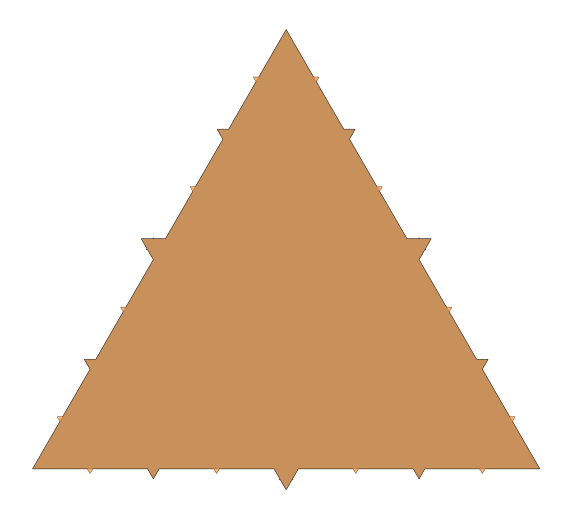

In [8]:
%%time
# fill the polygons
plt.figure(figsize=(10, 10))
## General initial coordinates
initial_shape = 3 # 3 = triangle, 4 = square, 5 = star, etc.
edge_length = 2 # Initial edge length
r = 0.1
angle_ini = 2.0 * np.pi / initial_shape



## FIRST ONE
coordinate = []
new_x, new_y = 0, 0

for i in range(initial_shape):
    coordinate.append((new_x,new_y))
    new_x += edge_length * np.cos(i * angle_ini)
    new_y += edge_length * np.sin(i * angle_ini)
    
## To form a circle.
coordinate.append(coordinate[0])

max_degree = 2 ## Define the recursion order
alpha_ratio = 3# 4/3
degre = np.pi/ alpha_ratio ## Define the fractal angle
direction = - 1  ## Define 凹(concave +1) 凸(convex -1)
for i in range(max_degree): ## Recursion Order
    num_edge = len(coordinate)
    for j in range(num_edge-1): ## How many times to insert new points?
        num_point = j * 4
        coordinate = coordinate[:num_point+1] + koch_line_mod(coordinate[num_point],coordinate[num_point+1],degre,direction,r) + coordinate[num_point+1:]
##end

# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])
plt.fill(pos_x, pos_y, edgecolor='black', lw=0.5, alpha = 0.6)





### NEXT GENERATION
coordinate = []
new_x, new_y = 0, 0

for i in range(initial_shape):
    coordinate.append((new_x,new_y))
    new_x += edge_length * np.cos(i * angle_ini)
    new_y += edge_length * np.sin(i * angle_ini)
    
## To form a circle.
coordinate.append(coordinate[0])

max_degree = 3 ## Define the recursion order
alpha_ratio = 3# 4/3
degre = np.pi/ alpha_ratio ## Define the fractal angle
direction = - 1  ## Define 凹(concave +1) 凸(convex -1)
for i in range(max_degree): ## Recursion Order
    num_edge = len(coordinate)
    for j in range(num_edge-1): ## How many times to insert new points?
        num_point = j * 4
        coordinate = coordinate[:num_point+1] + koch_line_mod(coordinate[num_point],coordinate[num_point+1],degre,direction,r) + coordinate[num_point+1:]
##end

# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])
plt.fill(pos_x, pos_y, edgecolor='black', lw=0.5, alpha = 0.6)





plt.axis('off')
plt.axis('scaled')
plt.show

CPU times: user 24.9 ms, sys: 3.16 ms, total: 28.1 ms
Wall time: 27.6 ms


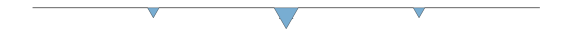

In [9]:
%%time
## General initial coordinates
initial_shape = 3 # 3 = triangle, 4 = square, 5 = star, etc.
edge_length = 2 # Initial edge length
r = 0.1
angle_ini = 2.0 * np.pi / initial_shape
coordinate = []
new_x, new_y = 0, 0

for i in range(initial_shape):
    coordinate.append((new_x,new_y))
    new_x += edge_length * np.cos(i * angle_ini)
    new_y += edge_length * np.sin(i * angle_ini)
    
## To form a circle.
coordinate.append(coordinate[0])


max_degree = 2 ## Define the recursion order
alpha_ratio = 3 
degre = np.pi/ alpha_ratio ## Define the fractal angle
direction = - 1  ## Define 凹(concave +1) 凸(convex -1)
for i in range(max_degree): ## Recursion Order
    num_edge = len(coordinate)
    for j in range(num_edge-1): ## How many times to insert new points?
        num_point = j * 4
        coordinate = coordinate[:num_point+1] + koch_line_mod(coordinate[num_point],coordinate[num_point+1],degre,direction,r) + coordinate[num_point+1:]
##end
     
    
# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)//3+1):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])

# fill the polygons
plt.figure(figsize=(10, 10))
#plt.figure(dpi=80)
plt.fill(pos_x, pos_y, edgecolor='black', lw=0.5, alpha = 0.6)
plt.axis('off')
plt.axis('scaled')

plt.show
filename='convex_rrlocal.pdf'
plt.savefig(filename, dpi=200, bbox_inches='tight')

CPU times: user 151 ms, sys: 30.6 ms, total: 182 ms
Wall time: 103 ms


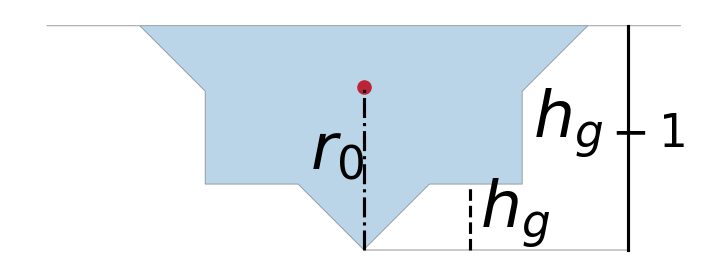

In [69]:
%%time
coordinate = Koch_generate(3,2,np.pi/2,-1,2)

# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])

dmd0 = 11/27 - 1/3
# fill the polygons
#plt.figure(figsize=(8,6))
plt.figure(dpi=150)
plt.rcParams.update({'font.size': 18})
plt.fill(pos_x[3:14], pos_y[3:14], edgecolor='black', lw=0.5, alpha = 0.3)
plt.scatter(pos_x[8],pos_y[8]+0.3,marker='o',color="red")
plt.plot([pos_x[8], pos_x[8]],[pos_y[8], pos_y[8]+0.3],'-.',color='black')
plt.text(pos_x[8]-0.1,pos_y[8]+0.15,r"$r_0$",size='xx-large')


plt.plot([pos_x[9]+dmd0, pos_x[9]+dmd0],[pos_y[8], pos_y[9]],'--',color='black')
plt.text(pos_x[9]+dmd0+0.02,(pos_y[9]+pos_y[8])/2-0.02,r"$h_{g}$",size='xx-large')


plt.plot([pos_x[12]+dmd0, pos_x[12]+dmd0],[pos_y[8], pos_y[4]],'-',color='black')
plt.text(pos_x[11]+0.02,(pos_y[4]+pos_y[8])/2,r"$h_{g-1}$",size='xx-large')
plt.plot([pos_x[8], pos_x[12]+dmd0],[pos_y[8], pos_y[8]],'-',linewidth=0.2,color='black')



plt.axis('off')
plt.axis('scaled')
plt.show
plt.savefig('hgmodel.pdf')

CPU times: user 152 ms, sys: 16.1 ms, total: 168 ms
Wall time: 170 ms


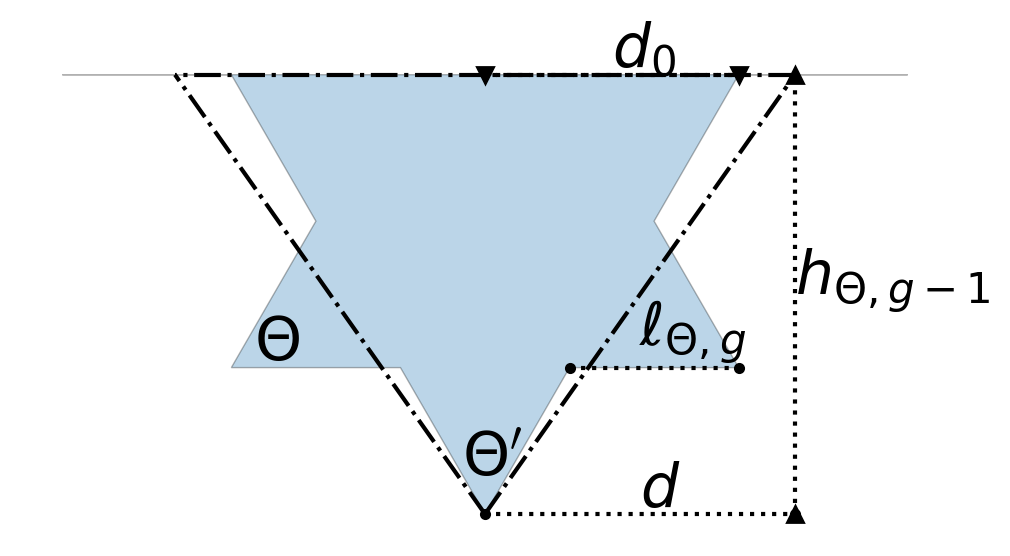

In [70]:
%%time
coordinate = Koch_generate(3,2,np.pi/3,-1,2)

# Extract all coordinates
pos_x = []
pos_y = []
for i in range(len(coordinate)):
    pos_x.append(coordinate[i][0])
    pos_y.append(coordinate[i][1])

dmd0 = 11/27 - 1/3
# fill the polygons
plt.figure(dpi=200)
plt.rcParams.update({'font.size': 18})
plt.fill(pos_x[3:14], pos_y[3:14], edgecolor='black', lw=0.5, alpha = 0.3)
#plt.scatter(pos_x[8],pos_y[8]+0.1,marker='o',color="red")

plt.plot([pos_x[8], pos_x[12]+dmd0],[pos_y[8], pos_y[12]], color='black', ls='-.')
plt.plot([pos_x[8], pos_x[4]-dmd0],[pos_y[8], pos_y[4]], color='black', ls='-.')
plt.plot([pos_x[12]+dmd0, pos_x[4]-dmd0],[pos_y[12], pos_y[4]], color='black', ls='-.')
#plt.fill([pos_x[8], pos_x[12]+dmd0, pos_x[4]-dmd0,], [pos_y[8], pos_y[12], pos_y[12]], edgecolor='black', lw=2)

plt.plot([pos_x[12]+dmd0, pos_x[12]+dmd0],[pos_y[8], pos_y[4]],'^k:',color='black')
plt.text(pos_x[12]+dmd0,(pos_y[4]+pos_y[8])/2,r"$h_{\Theta,g-1}$",size='large')
plt.plot([pos_x[8], pos_x[12]+dmd0],[pos_y[8], pos_y[8]],'.k:', color='black')
plt.text((pos_x[8]+pos_x[12]+dmd0)/2,pos_y[8]+0.01,r"$d$",size='large')

plt.plot([pos_x[9], pos_x[10]],[pos_y[9], pos_y[10]],'.k:', color='black')
plt.text((pos_x[9]+pos_x[10])/2-0.02,pos_y[9]+0.03,r"$\ell_{\Theta,g}$",size='large')
plt.plot([pos_x[8], pos_x[12]],[pos_y[12], pos_y[12]],'vk:',color='black')
plt.text((pos_x[8]+pos_x[12])/2,pos_y[12]+0.01,r"$d_0$",size='large')

plt.text((pos_x[7]+pos_x[9])/2-0.03,pos_y[8]+0.05,r"$\Theta^\prime$",size='large')
plt.text(pos_x[6]+0.03,pos_y[6]+0.01,r"$\Theta$",size='large')


plt.axis('off')
plt.axis('scaled')
plt.show
plt.savefig('tri1app.pdf')


In [12]:
L = 2
a = np.pi/3
g = 2
r = 2 * (1+np.sin(a/2))
l1 = L / r
l2 = l1 / r
h = np.cos(a/2) * l1
d0 = np.sin(a/2) * l1
print(l1,l2,h,d0)

d = (h*d0+2*l2**2*np.sin(a/2)*np.cos(a/2))/h
print(d-d0) ## = 11/27 - 1/3

0.6666666666666666 0.2222222222222222 0.5773502691896257 0.33333333333333326
0.07407407407407407


In [13]:
def hg(L,t,g):
    return (L*np.cos(t/2))/(2*(1+np.sin(t/2)))**g

def Tlogp(t):
    return 2*np.log(2*(1+np.sin(t*0.5)))

In [14]:
print(hg(2,np.pi*2/5,10))

print(hg(2,np.pi*3/4,5))
print(hg(2,np.pi*3/4,10))

print(hg(2,np.pi/3,3))
print(hg(2,np.pi/3,2))


1.5515652547615972e-05
0.0009074658826696655
1.0759471910241996e-06
0.06415002990995843
0.19245008972987526


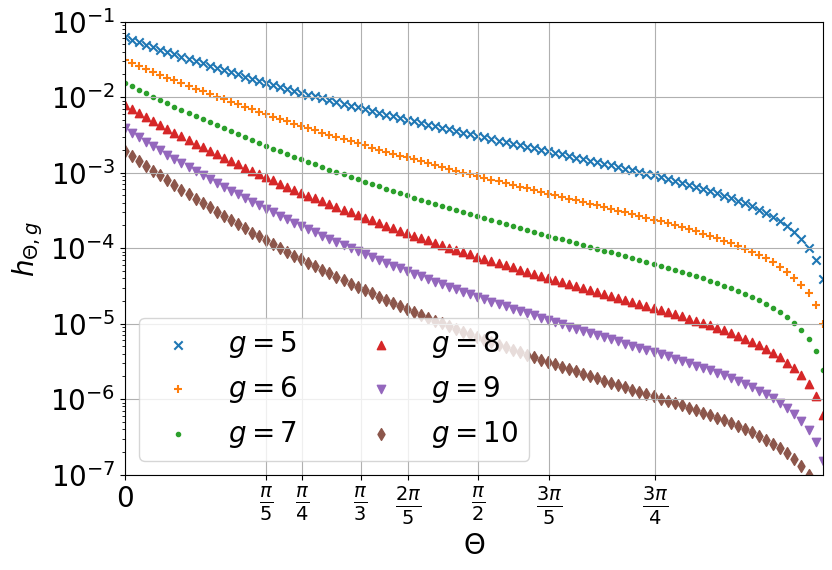

In [73]:
import itertools

xv = np.linspace(0,np.pi-0.04,100)

plt.figure(figsize=(9,6), dpi=100)
plt.rcParams.update({'font.size': 20})
plt.xlabel(r"$\Theta$")
plt.ylabel(r"$h_{\Theta,g}$")
plt.yscale('log')
plt.xlim(0,np.pi-0.04)

tick_pos= [0, np.pi/5, np.pi/4, np.pi/3, np.pi*2/5, np.pi/2, np.pi*3/5, np.pi*3/4]
labels = ['$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{3}$', r'$\frac{2\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{5}$', r'$\frac{3\pi}{4}$']
plt.xticks(tick_pos, labels)

marker = itertools.cycle(('x', '+', '.', '^', 'v', 'd'))
for i in range(5,11):
    yv = hg(2,xv,i)
    plt.scatter(xv,yv,label=r"$g =$"+str(i), marker=next(marker))

#for i in range(len(angles)):
    #plt.vlines(angles[i],1e-7,1e-1)
#for j in range(3):
#    xp = angles[i]
#    yp = 10**(j-5)
    #plt.scatter(xp,yp,marker='.',color='black')

plt.ylim(1e-7,1e-1)
plt.grid()
plt.legend(ncol=2,loc='lower left')
plt.show
plt.savefig('hgangle.pdf')

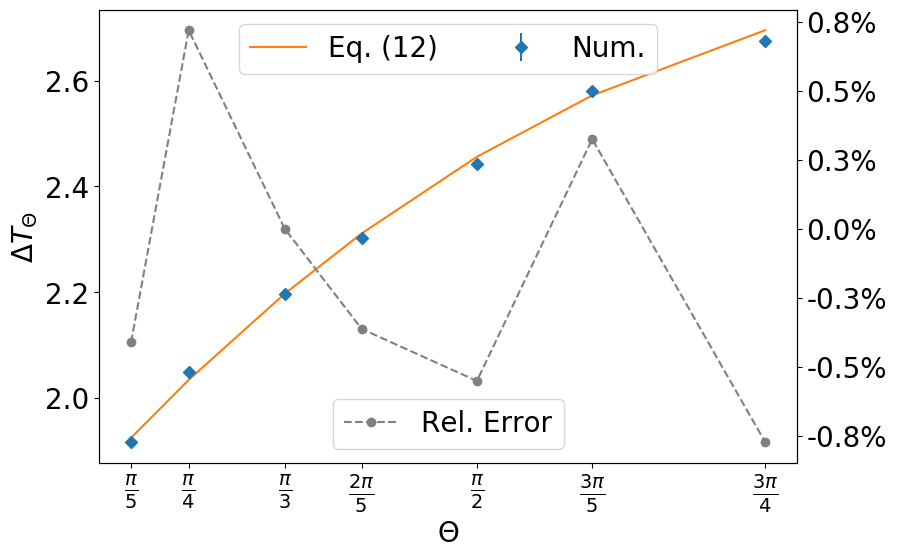

In [75]:
angles = [np.pi/5, np.pi/4, np.pi/3, np.pi*2/5, np.pi/2, np.pi*3/5, np.pi*3/4]
comrat = [6.8, 7.76, 9.0, 10.0, 11.5, 13.2, 14.5]

Tana = np.zeros(len(angles))
for i in range(len(angles)):
    Tana[i] = Tlogp(angles[i])

#plt.figure(dpi=150)
plt.figure(figsize=(9,6), dpi=100)
plt.rcParams.update({'font.size': 20})
plt.xlabel(r'$\Theta$')
plt.ylabel(r"$\Delta T_\Theta$")

tick_pos= [0, np.pi/5, np.pi/4, np.pi/3, np.pi*2/5, np.pi/2, np.pi*3/5, np.pi*3/4]
#labels = ['$0$', r'$\pi/5$', r'$\pi/4$', r'$\pi/3$', r'$2\pi/5$', r'$\pi/2$', r'$3\pi/5$', r'$3\pi/4$']
labels = ['$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{3}$', r'$\frac{2\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{5}$', r'$\frac{3\pi}{4}$']
plt.xticks(tick_pos, labels)

#plt.plot(angles,np.log(comrat),'D', fmt="o", label='Num.')
plt.errorbar(angles,np.log(comrat),0,marker='D', fmt="o",label="Num.")
plt.plot(angles,Tana,'-',label='Eq. (12)')
plt.legend(loc='upper center',ncol=2)



plt.twinx()
plt.plot(angles,np.log(comrat)/Tana-1,'o--',label='Rel. Error',color="gray")
plt.gca().set_yticklabels([f'{x:.1%}' for x in plt.gca().get_yticks()]) 
plt.legend(loc='lower center')
#plt.yticks(plt.yticks()[0], ['{:,.000%}'.format(x) for x in plt.yticks()[0]])



plt.show

plt.savefig('TlogPvalid.pdf')

$$ h = 2\ell (1+\sin(\alpha/2)) \cos(\alpha/2) \qquad d_0 = 2\ell (1+\sin(\alpha/2)) \sin(\alpha/2) $$
$$ d = d_0 + \frac{2\ell^2}{h} \sin(\alpha/2) \cos(\alpha/2) $$
$$ d = \ell_0 \sin\frac{\alpha}{2} ( 1 + \frac{1}{2} \sum_{n=1}^\infty \frac{1}{(1+\sin\frac{\alpha}{2})^{2n}}) = \ell_0 (\sin \frac{\alpha}{2} + \frac{1}{4+ 2 \sin\frac{\alpha}{2}})$$
$$ \frac{\theta}{2} = \frac{\pi}{2} - \arctan(h/d) = \arctan(d/h) $$
$$ \bar\alpha \simeq \frac{\pi}{2\theta} = \frac{\pi}{2\pi - 4\arctan(h/d)} $$


In [32]:
def agaire(a,nmax):
    #return np.pi/(2*np.pi + 4 * np.arctan((4*np.cos(a*0.5)*(1+np.sin(a*0.5))**2)/(-4+4*np.cos(a)-9*np.sin(a*0.5)+np.sin(a*1.5))))
    d = 2
    r = 1 + np.sin(a*0.5)
    for i in range(1,1+nmax):
        d += 1/r**(2*i)
    d *= 0.5 * np.sin(a*0.5)
    return np.pi/( 2*np.pi - 4 * np.arctan(np.cos(a*0.5) / d) )

def arcaire(a):
    return np.pi/(np.pi + a - np.cos(a*0.5)/(np.cos(0.25*(np.pi-a))**2))

def arctri(a):
    return 0.5 * np.pi / (a + (np.sin(a*0.5) * np.cos(a*0.5)) / ( (1+np.sin(a*0.5))**2 ))

def arc2(a):
    return 0.5 * np.pi / (a + (2*np.sin(a))/(1+2*np.sin(a*0.5))**2 )


def tri2d0(a):
    #hl1 = (np.cos(a*0.5) + 2*np.sin(a)) / (1+2*np.sin(a*0.5))
    hl1 = np.cos(a*0.5) * (1+ 2* np.sin(a*0.5))
    thetaeff = 2 * np.arctan( 0.5*np.sin(a)/hl1**2 + 2*(1+np.sin(a*0.5)) * (hl1 - np.cos(a*0.5)) / hl1**2 - (hl1-np.cos(a*0.5))**2 / (hl1**2 * np.tan(a)) )
    return 0.5 * np.pi / thetaeff

def arcr1(r,a): ## r/l1 \in (1, 2\cos(0.25*(\pi-\alpha)))
    hl1 = np.cos(0.5*a)
    St = r**2
    thetaeff = 2 * np.arccos (hl1/r) - 2 * np.cos(a*0.5)/r * np.sqrt(1- (hl1/r)**2) + np.sin(a)/r**2
    return 0.5 * np.pi / thetaeff

def circle3(r,a):
    thetaeff = a + 2 * np.sin(a) / r**2
    return 0.5 * np.pi / thetaeff

def tri0eql(a):
    S = np.sin(a)*(1+0.5/(1+np.sin(a*0.5))**2)
    if (S<=1):
        thetaeff = np.arcsin(S) 
    else:
        thetaeff = np.pi
    if (a==np.pi):
        thetaeff = np.pi
    return 0.5 * np.pi / thetaeff

def tri3P18(a):
    h = np.cos(a*0.5) * (2 + 2 * np.sin(a*0.5))
    thetaeff = 2 * np.arctan(np.sin(a)/h**2 + np.tan(a*0.5))
    return 0.5 * np.pi / thetaeff

def innbtri(a,nmax):
    d = 2
    r = 1 + np.sin(a*0.5)
    for i in range(1,1+nmax):
        d += 1/r**(2*i)
    d *= 0.5 * np.sin(a*0.5)
    aeff = np.arctan(d/np.cos(a*0.5))
    aext = 2*np.pi - aeff
    return np.pi/( 2 * aext )

In [33]:
print(innbtri(np.pi/3,500))

print(np.pi / ( 2 * (2*np.pi - 2 * np.arctan((13/6)/(np.sqrt(27)/2))) ))

print(np.pi / ( 2 * (2*np.pi - 2 * np.arctan((3/10)/(1/np.sqrt(12)))) ))

print(np.pi / ( 2 * (2*np.pi - 2 * np.arctan((1/2)/(np.sqrt(3)/18))) ))

0.2803286609292666
0.32103056190176604
0.3360770006230584
0.4460153229702796


In [77]:
angles = [np.pi/5, np.pi/4, np.pi/3, np.pi*2/5, np.pi/2, np.pi*3/5, np.pi*3/4, np.pi]
alpham = [1.89, 1.58, 1.31, 1.10, 0.90, 0.76, 0.63, 0.5]
lowbound = [1.82, 1.48, 1.20, 1.02, 0.85, 0.73, 0.62, 0.5]
uppbound = [1.96, 1.68, 1.42, 1.18, 0.95, 0.79, 0.64, 0.5]

alphaguess = np.zeros(len(alpham))
ag0 = np.zeros(len(alpham))
ag1 = np.zeros(len(alpham))
ag2 = np.zeros(len(alpham))
ag3 = np.zeros(len(alpham))
yerb= np.zeros(len(alpham))

for i in range(len(alpham)):
    #alphaguess[i] = agaire(angles[i])
    #alphaguess[i] = arcaire(angles[i])
    #alphaguess[i] = arctri(angles[i])
    #alphaguess[i] = arc2(angles[i])
    alphaguess[i] = tri2d0(angles[i])
    #alphaguess[i] = tri0eql(angles[i])
    #alphaguess[i] = tri3P18(angles[i])
    ag0[i] = agaire(angles[i],0)
    ag1[i] = agaire(angles[i],1)
    ag2[i] = agaire(angles[i],2)
    ag3[i] = agaire(angles[i],3)

    yerb[i] = 0.5 * (uppbound[i] - lowbound[i])

<function matplotlib.pyplot.show(*args, **kw)>

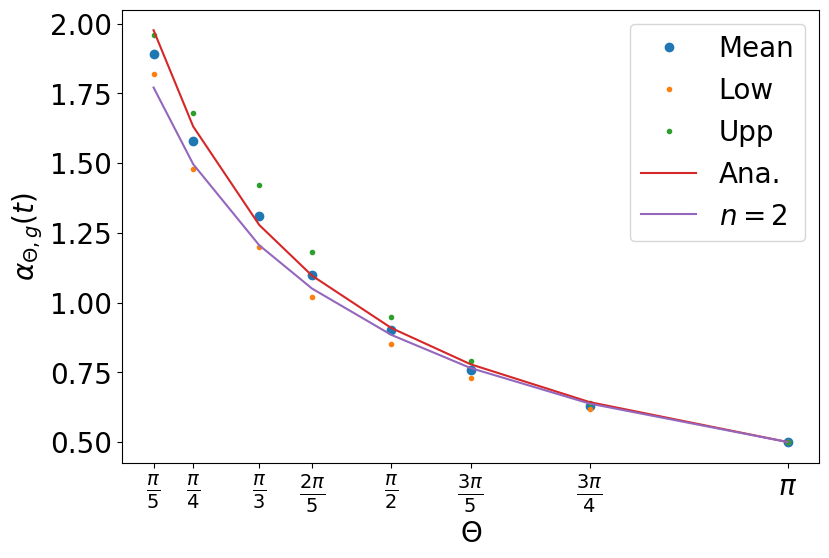

In [78]:
#plt.figure(dpi=120)
plt.figure(figsize=(9,6), dpi=100)
tick_pos= [0, np.pi/5, np.pi/4, np.pi/3, np.pi*2/5, np.pi/2, np.pi*3/5, np.pi*3/4, np.pi]
#labels = ['$0$', r'$\pi/5$', r'$\pi/4$', r'$\pi/3$', r'$2\pi/5$', r'$\pi/2$', r'$3\pi/5$', r'$3\pi/4$', r'$\pi$']
labels = ['$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{3}$', r'$\frac{2\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{5}$', r'$\frac{3\pi}{4}$', r'$\pi$']
plt.xlabel(r"$\Theta$")
plt.ylabel(r"$\alpha_{\Theta,g}(t)$")
plt.plot(angles,alpham,'o',label="Mean")
plt.plot(angles,lowbound,'.',label="Low")
plt.plot(angles,uppbound,'.',label="Upp")
plt.xticks(tick_pos, labels)
#plt.plot(angles,alphaguess,'--',label="TEST")
#plt.plot(angles,ag0,label=r"$n = 0$")
plt.plot(angles,ag1,label="Ana.")
plt.plot(angles,ag2,label=r"$n = 2$")
#plt.plot(angles,ag3,label=r"$n = 3$")
plt.legend()
plt.show

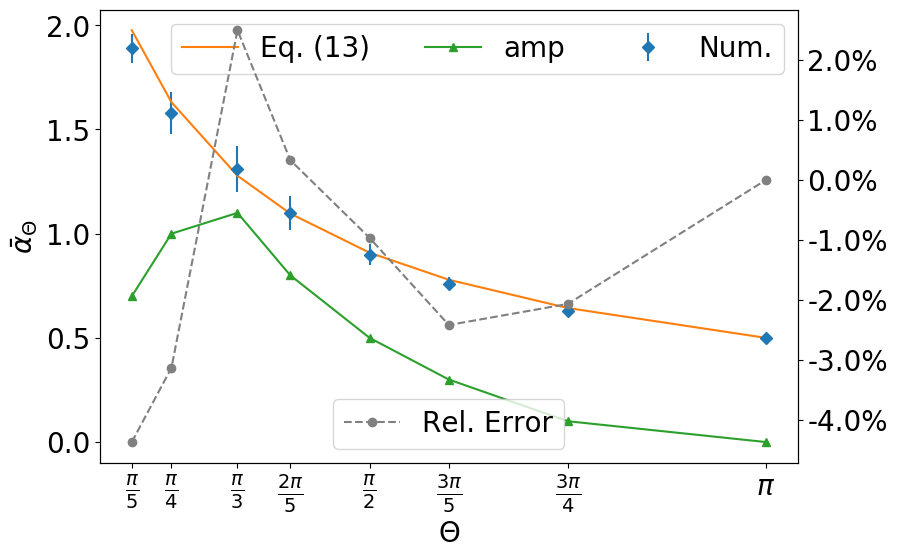

In [80]:
#plt.figure(dpi=120)
plt.figure(figsize=(9,6), dpi=100)
plt.rcParams.update({'font.size': 20})
tick_pos= [0, np.pi/5, np.pi/4, np.pi/3, np.pi*2/5, np.pi/2, np.pi*3/5, np.pi*3/4, np.pi]
#labels = ['$0$', r'$\pi/5$', r'$\pi/4$', r'$\pi/3$', r'$2\pi/5$', r'$\pi/2$', r'$3\pi/5$', r'$3\pi/4$', r'$\pi$']
labels = ['$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{3}$', r'$\frac{2\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{5}$', r'$\frac{3\pi}{4}$', r'$\pi$']
plt.xlabel(r"$\Theta$")
plt.ylabel(r"$\bar{\alpha}_{\Theta}$")

plt.xticks(tick_pos, labels)

plt.errorbar(angles,alpham,yerb,marker='D', fmt="o",label="Num.")
plt.plot(angles,ag1,'-',label="Eq. (13)")
#plt.plot(angles,lowbound,'.',label="Low")
#plt.plot(angles,uppbound,'.',label="Upp")
plt.plot(angles,yerb*10,'-^',label="amp")
plt.legend(loc='upper right',ncol=3)


plt.twinx()
plt.plot(angles,alpham/ag1 - 1,'o--',label="Rel. Error",color='gray')
plt.gca().set_yticklabels([f'{x:.1%}' for x in plt.gca().get_yticks()]) 
plt.legend(loc='lower center')

plt.show
plt.savefig("alphameanv.pdf")

In [26]:
alpham/ag1 - 1

array([-0.04369135, -0.03131854,  0.02496493,  0.00329872, -0.00965053,
       -0.02417928, -0.02067098,  0.        ])

<function matplotlib.pyplot.show(*args, **kw)>

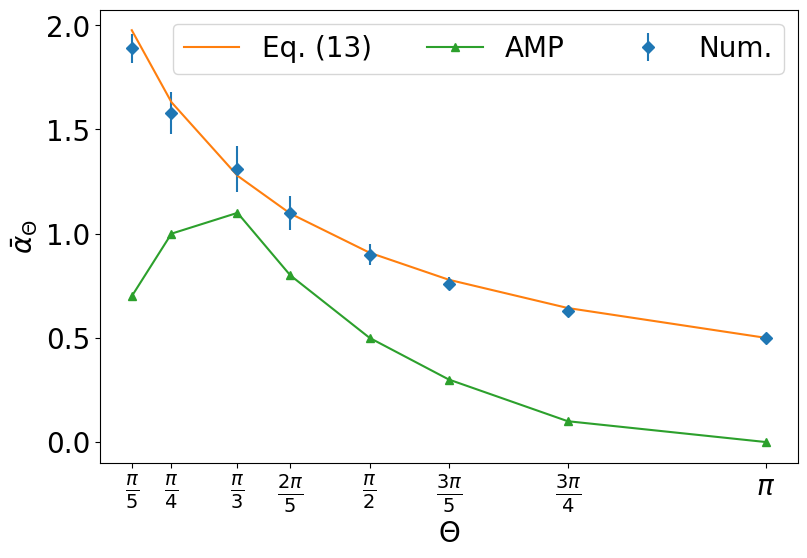

In [57]:
#plt.figure(dpi=120)
plt.figure(figsize=(9,6), dpi=100)
tick_pos= [0, np.pi/5, np.pi/4, np.pi/3, np.pi*2/5, np.pi/2, np.pi*3/5, np.pi*3/4, np.pi]
#labels = ['$0$', r'$\pi/5$', r'$\pi/4$', r'$\pi/3$', r'$2\pi/5$', r'$\pi/2$', r'$3\pi/5$', r'$3\pi/4$', r'$\pi$']
labels = ['$0$', r'$\frac{\pi}{5}$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{3}$', r'$\frac{2\pi}{5}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{5}$', r'$\frac{3\pi}{4}$', r'$\pi$']
plt.xlabel(r"$\Theta$")
plt.ylabel(r"$\bar{\alpha}_{\Theta}$")

plt.xticks(tick_pos, labels)

plt.errorbar(angles,alpham,yerb,marker='D', fmt="o",label="Num.")
plt.plot(angles,ag1,'-',label="Eq. (13)")
plt.plot(angles,yerb*10,'-^',label="AMP")
#plt.hlines(0,angles[0],angles[-1])

plt.legend(loc='upper right',ncol=3)


plt.show
#plt.savefig("alphameanv.pdf")